<a href="https://colab.research.google.com/github/sofiarodriguez-blip/Estadistica/blob/main/An%C3%A1lisis_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Consumo de Bebidas Energizantes en Estudiantes

⚠️  INSTRUCCIONES PARA USAR CON TUS DATOS:
----------------------------------------------------------------------
1. Carga tu archivo Excel con: df_raw = pd.read_excel('tu_archivo.xlsx')
2. Aplica los mapeos a las columnas categóricas
3. Selecciona las variables X e Y para el análisis
4. Ejecuta el resto del código

📊 ANÁLISIS CONFIGURADO:
Número de observaciones: 100 estudiantes
Variable independiente (X): Frecuencia_Consumo
  → Frecuencia de consumo (0=Nunca, 4=Siempre)
Variable dependiente (Y): Mejora_Energia_Estudio
  → Mejora de energía en jornadas de estudio (1-5)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Estadísticas Descriptivas:
----------------------------------------------------------------------

Frecuencia_Consumo:
  Media: 1.620
  Mediana: 2.000
  Desviación estándar: 1.332
  Mínimo: 0.000
  Máximo: 4.000

Mejora_Energia_Estudio:
  Media: 3.250

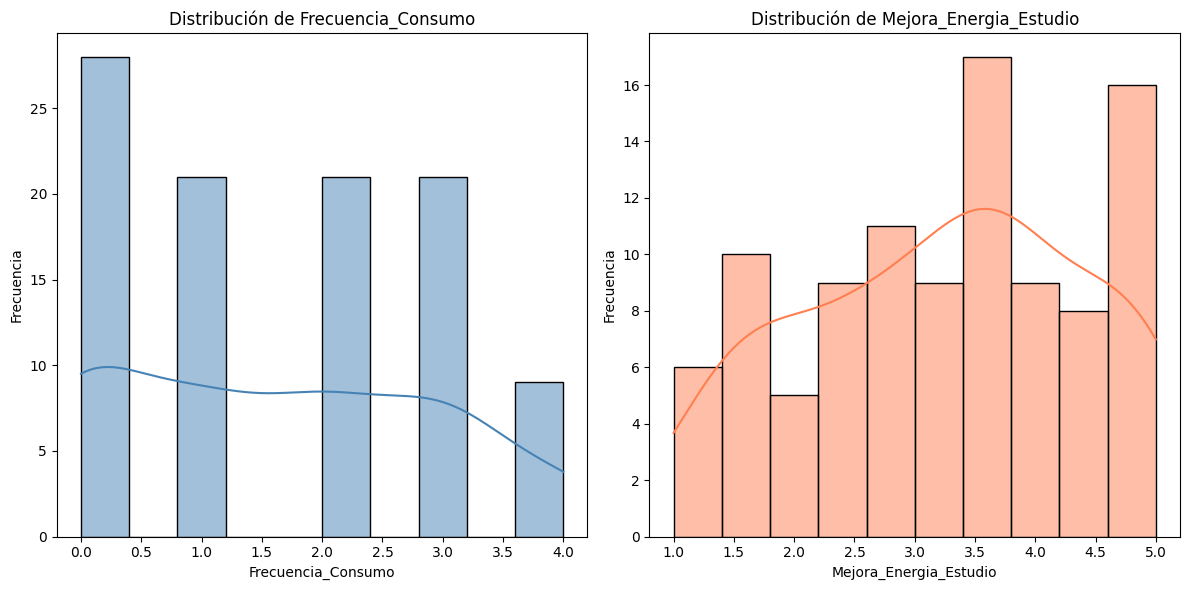

Generando Diagrama de Dispersión...


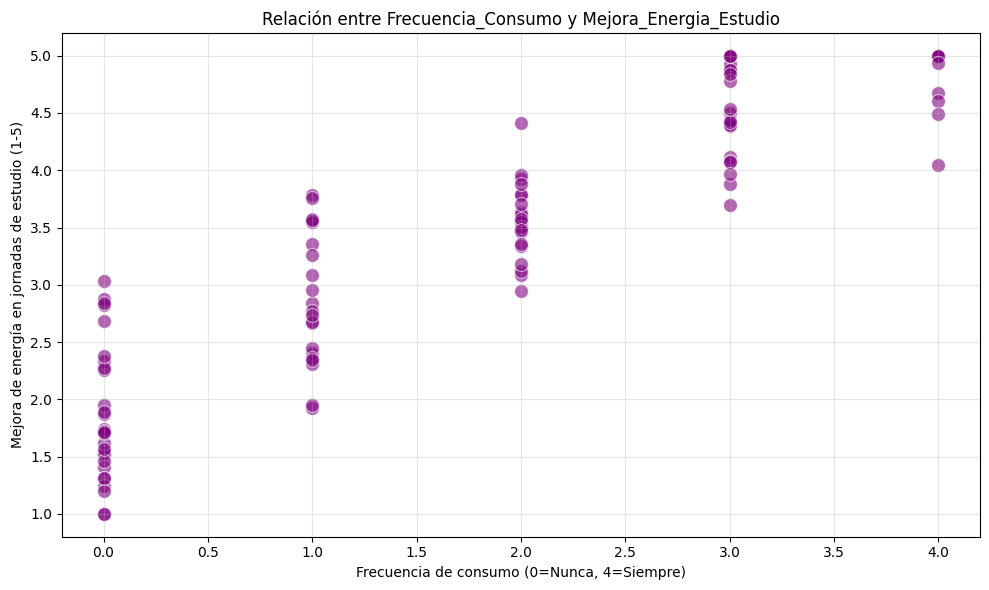


Pruebas de Normalidad (Shapiro-Wilk):
----------------------------------------------------------------------
Variable X (Frecuencia_Consumo):
  Estadístico W: 0.8834
  Valor p: 0.0000
  ✗ No normal

Variable Y (Mejora_Energia_Estudio):
  Estadístico W: 0.9539
  Valor p: 0.0015
  ✗ No normal


Coeficientes de Correlación:
----------------------------------------------------------------------
Pearson:  0.9016
Spearman: 0.9169
Kendall:  0.7882

✓ Coeficiente seleccionado: Spearman (apropiado para datos no normales)
  r = 0.9169
  Interpretación: Correlación fuerte positiva

--- PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---

Hipótesis:
  H₀: ρ = 0 (No existe correlación)
  H₁: ρ ≠ 0 (Existe correlación)

Resultados:
  Grados de libertad: 98
  Coeficiente r: 0.9169
  Estadístico t: 22.7433
  Valor crítico: ±1.9845
  Valor p: 0.0000

✓ DECISIÓN: RECHAZAR H₀
  Conclusión: Existe correlación significativa (p < 0.05)

--- MODELO DE REGRESIÓN LINEAL ---

Coeficientes del Modelo:
  Pendiente (b₁):

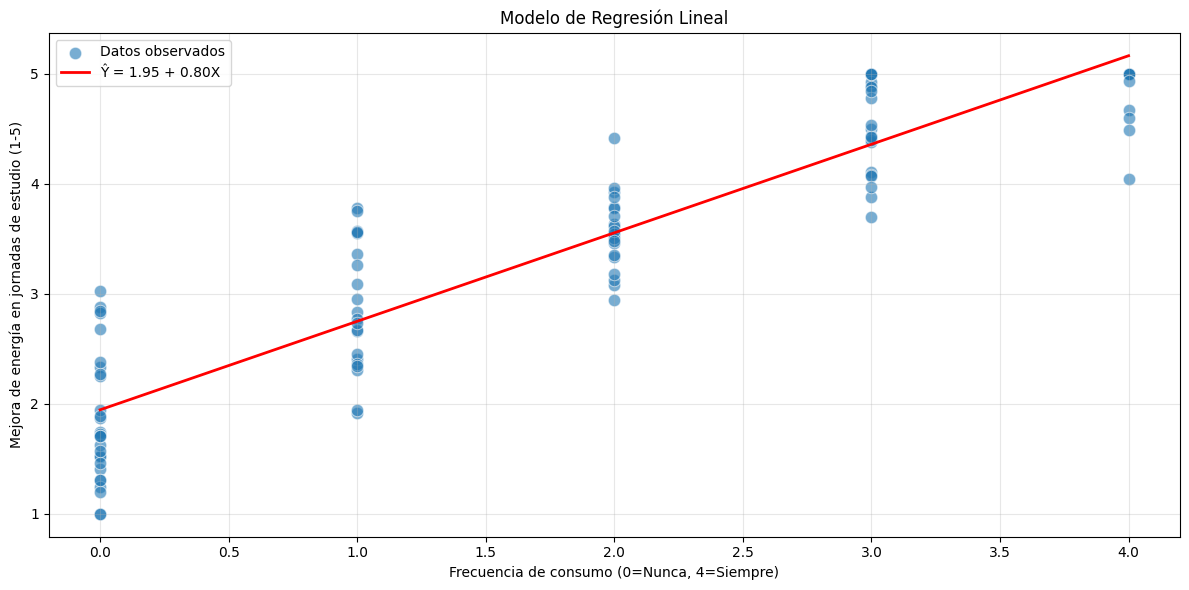


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
  H₀: β = 0 (La pendiente no es significativa)
  H₁: β ≠ 0 (La pendiente es significativa)

Resultados:
  Error estándar de b₁: 0.0384
  Estadístico t: 20.9704
  Valor crítico: ±1.9845
  Valor p: 0.0000

✓ DECISIÓN: RECHAZAR H₀
  La pendiente ES significativa (p < 0.05)

--- COEFICIENTE DE DETERMINACIÓN (R²) ---

Descomposición de Varianza:
  SS Total:     135.3012
  SS Regresión: 109.9521  (81.26%)
  SS Error:     25.3491  (18.74%)

Coeficiente de Determinación:
  R² = 0.8407

┌─────────────────────────────────────────────────────────────────┐
│  INTERPRETACIÓN:                                              │
│  El 84.07% de la variabilidad en Mejora_Energia_Estudio    │
│  es explicada por Frecuencia_Consumo                     │
└─────────────────────────────────────────────────────────────────┘

--- TABLA ANOVA ---

Fuente          SS           gl       MS           F            p-value     
-------------------------------

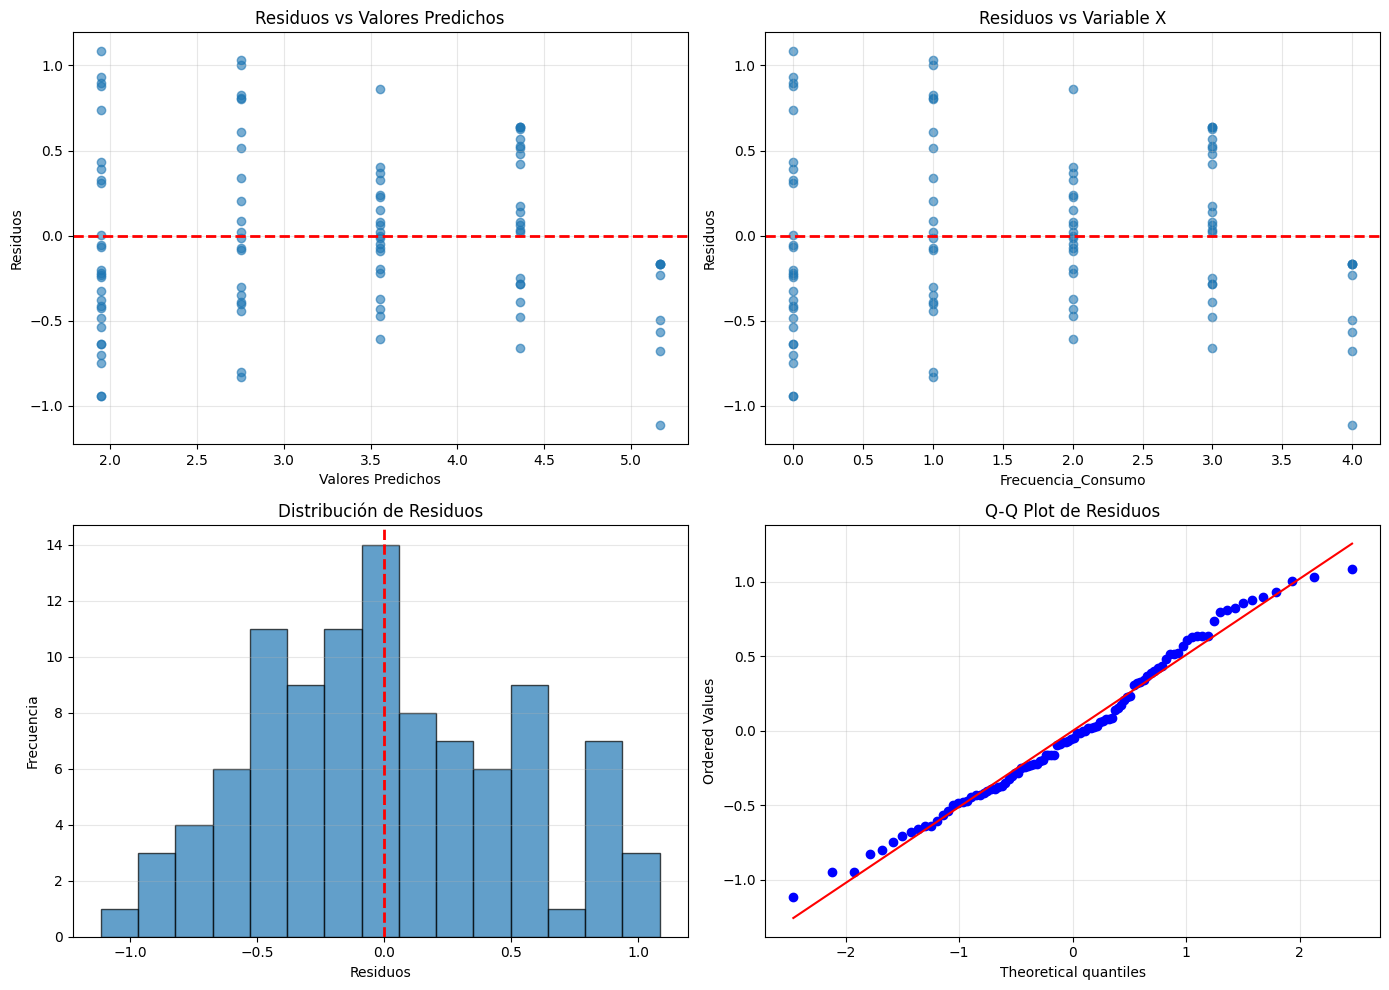


Interpretación de gráficos:
  • Residuos vs Predichos: Buscar patrones (debe verse aleatorio)
  • Histograma: Debe parecer aproximadamente normal
  • Q-Q Plot: Los puntos deben estar cerca de la línea diagonal

╔══════════════════════════════════════════════════════════════╗
║              RESUMEN EJECUTIVO DEL ANÁLISIS                  ║
╚══════════════════════════════════════════════════════════════╝

📊 MODELO:
   Ŷ = 1.9457 + 0.8049 × X

📈 CALIDAD DEL AJUSTE:
   • Correlación (r): 0.9169 - Correlación fuerte positiva
   • R²: 0.8407 - Explica el 84.07% de la variabilidad
   • Error estándar: 0.5086

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: ✓ SIGNIFICATIVA (p = 0.0000)
   • Pendiente: ✓ SIGNIFICATIVA (p = 0.0000)
   • Modelo ANOVA: ✓ SIGNIFICATIVO (p = 0.000000)

🔍 SUPUESTOS:
   • Normalidad de X: ✗ (p = 0.0000)
   • Normalidad de Y: ✗ (p = 0.0015)
   • Normalidad de residuos: ✓ (p = 0.1847)

💡 CONCLUSIÓN:

   ✓ EL MODELO ES VÁLIDO Y ÚTIL
   
   El modelo explica 84.07% de la 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- CONFIGURACIÓN INICIAL ---
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Consumo de Bebidas Energizantes en Estudiantes")
print("=" * 70)

# --- CARGA DE DATOS ---
# NOTA: Ajusta la ruta del archivo según tu ubicación
# archivo = 'CONSUMO DE BEBIDAS ENERGIZANTES.xlsx'
# df_raw = pd.read_excel(archivo)

# Para este ejemplo, crearemos un DataFrame de muestra
# REEMPLAZA ESTO con tus datos reales

# Mapeo de respuestas categóricas a valores numéricos
mapeo_frecuencia = {
    'Nunca': 0,
    'Rara vez': 1,
    'A veces': 2,
    'A menudo': 3,
    'Siempre': 4
}

mapeo_tiempo_consumo = {
    'Nunca las he consumido': 0,
    'Menos de 6 meses': 0.5,
    'Entre 7 meses y 1 año': 1,
    'Entre 2 y 3 años': 2.5,
    'Más de 4 años': 5
}

mapeo_influencia = {
    'Negativamente': -1,
    'No influye': 0,
    'Positivamente': 1
}

mapeo_acuerdo = {
    'Totalmente en desacuerdo': 1,
    'En desacuerdo': 2,
    'Ni de acuerdo ni en desacuerdo': 3,
    'De acuerdo': 4,
    'Totalmente de acuerdo': 5
}

# EJEMPLO DE DATOS (sustituye con tus datos reales)
# Aquí debes cargar tu archivo Excel y aplicar los mapeos
print("\n⚠️  INSTRUCCIONES PARA USAR CON TUS DATOS:")
print("-" * 70)
print("1. Carga tu archivo Excel con: df_raw = pd.read_excel('tu_archivo.xlsx')")
print("2. Aplica los mapeos a las columnas categóricas")
print("3. Selecciona las variables X e Y para el análisis")
print("4. Ejecuta el resto del código")
print("=" * 70)

# --- EJEMPLO CON DATOS SIMULADOS ---
# (Elimina esta sección cuando uses tus datos reales)
np.random.seed(42)
n_estudiantes = 100

# Simulación de datos para demostración
df = pd.DataFrame({
    'Frecuencia_Consumo': np.random.choice([0, 1, 2, 3, 4], n_estudiantes, p=[0.2, 0.25, 0.25, 0.2, 0.1]),
    'Tiempo_Consumo_Años': np.random.choice([0, 0.5, 1, 2.5, 5], n_estudiantes, p=[0.15, 0.2, 0.25, 0.25, 0.15]),
    'Influencia_Rendimiento': np.random.choice([-1, 0, 1], n_estudiantes, p=[0.2, 0.3, 0.5]),
    'Mejora_Energia_Examen': np.random.choice([1, 2, 3, 4, 5], n_estudiantes),
    'Mejora_Energia_Presion': np.random.choice([1, 2, 3, 4, 5], n_estudiantes),
    'Efectos_Negativos': np.random.choice([0, 1], n_estudiantes, p=[0.7, 0.3])
})

# Crear correlación artificial para demostración
df['Mejora_Energia_Estudio'] = (df['Frecuencia_Consumo'] * 0.8 +
                                 np.random.normal(0, 0.5, n_estudiantes) + 2).clip(1, 5)

# --- SELECCIÓN DE VARIABLES PARA ANÁLISIS ---
# Cambia estas variables según lo que quieras analizar
variable_x = 'Frecuencia_Consumo'
variable_y = 'Mejora_Energia_Estudio'

# Descripción de las variables
descripciones = {
    'Frecuencia_Consumo': 'Frecuencia de consumo (0=Nunca, 4=Siempre)',
    'Tiempo_Consumo_Años': 'Tiempo de consumo en años',
    'Influencia_Rendimiento': 'Influencia percibida en rendimiento (-1=Negativa, 0=Ninguna, 1=Positiva)',
    'Mejora_Energia_Examen': 'Mejora de energía durante exámenes (1-5)',
    'Mejora_Energia_Presion': 'Mejora de energía bajo presión (1-5)',
    'Mejora_Energia_Estudio': 'Mejora de energía en jornadas de estudio (1-5)',
    'Efectos_Negativos': 'Ha experimentado efectos negativos (0=No, 1=Sí)'
}

n = len(df)
alfa = 0.05

print(f"\n📊 ANÁLISIS CONFIGURADO:")
print(f"Número de observaciones: {n} estudiantes")
print(f"Variable independiente (X): {variable_x}")
print(f"  → {descripciones.get(variable_x, 'Sin descripción')}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"  → {descripciones.get(variable_y, 'Sin descripción')}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print("-" * 70)
for var in [variable_x, variable_y]:
    print(f"\n{var}:")
    print(f"  Media: {df[var].mean():.3f}")
    print(f"  Mediana: {df[var].median():.3f}")
    print(f"  Desviación estándar: {df[var].std():.3f}")
    print(f"  Mínimo: {df[var].min():.3f}")
    print(f"  Máximo: {df[var].max():.3f}")

# 1. Histogramas
print("\n\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue', bins=10)
plt.title(f'Distribución de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral', bins=10)
plt.title(f'Distribución de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Diagrama de Dispersión
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6, color='purple')
plt.title(f'Relación entre {variable_x} y {variable_y}')
plt.xlabel(descripciones.get(variable_x, variable_x))
plt.ylabel(descripciones.get(variable_y, variable_y))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Pruebas de Normalidad
print("\nPruebas de Normalidad (Shapiro-Wilk):")
print("-" * 70)
shapiro_x = shapiro(df[variable_x])
shapiro_y = shapiro(df[variable_y])

print(f"Variable X ({variable_x}):")
print(f"  Estadístico W: {shapiro_x.statistic:.4f}")
print(f"  Valor p: {shapiro_x.pvalue:.4f}")
print(f"  {'✓ Distribución normal' if shapiro_x.pvalue > alfa else '✗ No normal'}")

print(f"\nVariable Y ({variable_y}):")
print(f"  Estadístico W: {shapiro_y.statistic:.4f}")
print(f"  Valor p: {shapiro_y.pvalue:.4f}")
print(f"  {'✓ Distribución normal' if shapiro_y.pvalue > alfa else '✗ No normal'}")

# 4. Coeficientes de Correlación
print("\n\nCoeficientes de Correlación:")
print("-" * 70)
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')

print(f"Pearson:  {pearson_corr:.4f}")
print(f"Spearman: {spearman_corr:.4f}")
print(f"Kendall:  {kendall_corr:.4f}")

# Seleccionar el coeficiente apropiado
if shapiro_x.pvalue > alfa and shapiro_y.pvalue > alfa:
    r = pearson_corr
    metodo_usado = "Pearson (apropiado para datos normales)"
else:
    r = spearman_corr
    metodo_usado = "Spearman (apropiado para datos no normales)"

print(f"\n✓ Coeficiente seleccionado: {metodo_usado}")
print(f"  r = {r:.4f}")

# Interpretación de la correlación
if abs(r) < 0.3:
    fuerza = "débil"
elif abs(r) < 0.7:
    fuerza = "moderada"
else:
    fuerza = "fuerte"

direccion = "positiva" if r > 0 else "negativa"
print(f"  Interpretación: Correlación {fuerza} {direccion}")

print("=" * 70)

# =========================================================================
# --- PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================
print("\n--- PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---")
print("=" * 70)

gl = n - 2
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

valor_p = t.sf(abs(t_calculado), gl) * 2
t_critico = t.ppf(1 - alfa / 2, gl)

print(f"\nHipótesis:")
print(f"  H₀: ρ = 0 (No existe correlación)")
print(f"  H₁: ρ ≠ 0 (Existe correlación)")

print(f"\nResultados:")
print(f"  Grados de libertad: {gl}")
print(f"  Coeficiente r: {r:.4f}")
print(f"  Estadístico t: {t_calculado:.4f}")
print(f"  Valor crítico: ±{t_critico:.4f}")
print(f"  Valor p: {valor_p:.4f}")

if valor_p < alfa:
    print(f"\n✓ DECISIÓN: RECHAZAR H₀")
    print(f"  Conclusión: Existe correlación significativa (p < {alfa})")
else:
    print(f"\n✗ DECISIÓN: NO RECHAZAR H₀")
    print(f"  Conclusión: No hay evidencia de correlación significativa")

print("=" * 70)

# =========================================================================
# --- MODELO DE REGRESIÓN LINEAL ---
# =========================================================================
print("\n--- MODELO DE REGRESIÓN LINEAL ---")
print("=" * 70)

# Calcular parámetros del modelo
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)

b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print(f"\nCoeficientes del Modelo:")
print(f"  Pendiente (b₁): {b1:.4f}")
print(f"  Intercepto (b₀): {b0:.4f}")

print(f"\n┌{'─'*60}┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                                    │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} × X                         │")
print(f"└{'─'*60}┘")

print(f"\nInterpretación:")
print(f"  • Por cada unidad que aumenta {variable_x},")
print(f"    {variable_y} {'aumenta' if b1 > 0 else 'disminuye'} en {abs(b1):.4f} unidades")
print(f"  • Cuando {variable_x} = 0, se predice {variable_y} = {b0:.4f}")

# Predicciones y residuos
df['y_predicho'] = b0 + b1 * df[variable_x]
df['residuos'] = df[variable_y] - df['y_predicho']

# Error estándar de estimación
SSE = (df['residuos'] ** 2).sum()
s_yx = np.sqrt(SSE / (n - 2))

print(f"\nError Estándar de Estimación:")
print(f"  s_y,x = {s_yx:.4f}")

# Visualización del modelo
plt.figure(figsize=(12, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, alpha=0.6, s=80, label='Datos observados')

x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Ŷ = {b0:.2f} + {b1:.2f}X')

plt.xlabel(descripciones.get(variable_x, variable_x))
plt.ylabel(descripciones.get(variable_y, variable_y))
plt.title('Modelo de Regresión Lineal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 70)

# =========================================================================
# --- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================
print("\n--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Error estándar de la pendiente
suma_desviaciones_x = ((df[variable_x] - mean_x) ** 2).sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

# Estadístico t para la pendiente
t_pendiente = b1 / s_b
valor_p_pendiente = t.sf(abs(t_pendiente), gl) * 2
t_critico_pendiente = t.ppf(1 - alfa / 2, gl)

print(f"\nHipótesis:")
print(f"  H₀: β = 0 (La pendiente no es significativa)")
print(f"  H₁: β ≠ 0 (La pendiente es significativa)")

print(f"\nResultados:")
print(f"  Error estándar de b₁: {s_b:.4f}")
print(f"  Estadístico t: {t_pendiente:.4f}")
print(f"  Valor crítico: ±{t_critico_pendiente:.4f}")
print(f"  Valor p: {valor_p_pendiente:.4f}")

if valor_p_pendiente < alfa:
    print(f"\n✓ DECISIÓN: RECHAZAR H₀")
    print(f"  La pendiente ES significativa (p < {alfa})")
else:
    print(f"\n✗ DECISIÓN: NO RECHAZAR H₀")
    print(f"  La pendiente NO es significativa")

print("=" * 70)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================
print("\n--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE
r_cuadrado = r ** 2

print(f"\nDescomposición de Varianza:")
print(f"  SS Total:     {SS_Total:.4f}")
print(f"  SS Regresión: {SSR:.4f}  ({(SSR/SS_Total)*100:.2f}%)")
print(f"  SS Error:     {SSE:.4f}  ({(SSE/SS_Total)*100:.2f}%)")

print(f"\nCoeficiente de Determinación:")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\n┌{'─'*65}┐")
print(f"│  INTERPRETACIÓN:                                              │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en {variable_y:<25} │")
print(f"│  es explicada por {variable_x:<38} │")
print(f"└{'─'*65}┘")

print("=" * 70)

# =========================================================================
# --- TABLA ANOVA ---
# =========================================================================
print("\n--- TABLA ANOVA ---")
print("=" * 70)

MSR = SSR / 1
MSE = SSE / (n - 2)
F_calculado = MSR / MSE
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<15} {'SS':<12} {'gl':<8} {'MS':<12} {'F':<12} {'p-value':<12}")
print("-" * 75)
print(f"{'Regresión':<15} {SSR:<12.4f} {1:<8} {MSR:<12.4f} {F_calculado:<12.4f} {valor_p_f:<12.6f}")
print(f"{'Error':<15} {SSE:<12.4f} {n-2:<8} {MSE:<12.4f}")
print(f"{'Total':<15} {SS_Total:<12.4f} {n-1:<8}")

print(f"\nConclusión del modelo:")
if valor_p_f < alfa:
    print(f"  ✓ El modelo ES significativo (p < {alfa})")
else:
    print(f"  ✗ El modelo NO es significativo")

print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================
print("\n--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

df['residuos_estandarizados'] = df['residuos'] / s_yx

print(f"\nEstadísticas de Residuos:")
print(f"  Media: {df['residuos'].mean():.6f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Mínimo: {df['residuos'].min():.4f}")
print(f"  Máximo: {df['residuos'].max():.4f}")

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos:")
print(f"  Estadístico W: {shapiro_residuos.statistic:.4f}")
print(f"  Valor p: {shapiro_residuos.pvalue:.4f}")
print(f"  {'✓ Los residuos son normales' if shapiro_residuos.pvalue > alfa else '✗ Los residuos no son normales'}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].set_title('Residuos vs Valores Predichos')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x)
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs Variable X')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de residuos
axes[1, 0].hist(df['residuos'], bins=15, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretación de gráficos:")
print("  • Residuos vs Predichos: Buscar patrones (debe verse aleatorio)")
print("  • Histograma: Debe parecer aproximadamente normal")
print("  • Q-Q Plot: Los puntos deben estar cerca de la línea diagonal")

print("=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO ---
# =========================================================================
print("\n" + "=" * 70)
print("╔══════════════════════════════════════════════════════════════╗")
print("║              RESUMEN EJECUTIVO DEL ANÁLISIS                  ║")
print("╚══════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO:
   Ŷ = {b0:.4f} + {b1:.4f} × X

📈 CALIDAD DEL AJUSTE:
   • Correlación (r): {r:.4f} - Correlación {fuerza} {direccion}
   • R²: {r_cuadrado:.4f} - Explica el {r_cuadrado*100:.2f}% de la variabilidad
   • Error estándar: {s_yx:.4f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p:.4f})
   • Pendiente: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'} (p = {valor_p_pendiente:.4f})
   • Modelo ANOVA: {'✓ SIGNIFICATIVO' if valor_p_f < alfa else '✗ NO SIGNIFICATIVO'} (p = {valor_p_f:.6f})

🔍 SUPUESTOS:
   • Normalidad de X: {'✓' if shapiro_x.pvalue > alfa else '✗'} (p = {shapiro_x.pvalue:.4f})
   • Normalidad de Y: {'✓' if shapiro_y.pvalue > alfa else '✗'} (p = {shapiro_y.pvalue:.4f})
   • Normalidad de residuos: {'✓' if shapiro_residuos.pvalue > alfa else '✗'} (p = {shapiro_residuos.pvalue:.4f})

💡 CONCLUSIÓN:
""")

if valor_p_f < alfa and r_cuadrado > 0.3:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL

   El modelo explica {r_cuadrado*100:.2f}% de la variabilidad y es estadísticamente
   significativo. Puede usarse para hacer predicciones sobre {variable_y}
   basándose en {variable_x}.

   RECOMENDACIÓN: El modelo puede aplicarse para análisis y predicciones.
""")
elif valor_p_f < alfa and r_cuadrado <= 0.3:
    print(f"""   ⚠ EL MODELO ES SIGNIFICATIVO PERO DÉBIL

   Aunque el modelo es estadísticamente significativo, solo explica
   {r_cuadrado*100:.2f}% de la variabilidad. Esto sugiere que hay otros factores
   importantes que no están siendo considerados.

   RECOMENDACIÓN: Considerar incluir variables adicionales o explorar
   otros modelos más complejos.
""")
else:
    print(f"""   ✗ EL MODELO NO ES ADECUADO

   El modelo no muestra una relación significativa entre las variables.

   RECOMENDACIÓN: Explorar otras variables o métodos de análisis.
""")

print("=" * 70)
print("\n✓ ANÁLISIS COMPLETADO")
print("=" * 70)

print("\n\n📝 PRÓXIMOS PASOS:")
print("-" * 70)
print("1. Reemplaza los datos simulados con tus datos reales del Excel")
print("2. Ajusta las variables X e Y según tu pregunta de investigación")
print("3. Interpreta los resultados en el contexto de tu estudio")
print("4. Considera análisis adicionales si el modelo lo requiere")
print("=" * 70)